In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import data

In [75]:


file_path = '/content/drive/MyDrive/Semester 5/Data Mining/dataKasus-1.xlsx'

df = pd.read_excel(file_path)
data = pd.read_excel(file_path)

print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
   NO    NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3  20 TH        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4  18 TH        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tidak                              Ada         >UMR        PE         NaN  
2  Tidak                            Tidak         >UMR    Non PE         NaN  
3  Tidak                            Tidak         >UMR    Non PE         NaN  
4  Tidak                            Tidak         >UMR    Non PE         NaN  


#Pembersihan Data


- Menghapus nilai NaN dan mengubah kolom usia menjadi tipe data numerik.
- Mengganti nama kolom untuk memudahkan pemanggilan.

In [76]:
# Bersihkan data kolom usia dan ubah menjadi integer
data['USIA'] = data['USIA'].str.replace(r'\D', '', regex=True).astype(float)

# Mengganti nama kolom untuk memudahkan pemanggilan
data.columns = ['NO', 'NAMA', 'USIA', 'PARITAS', 'JARAK_KELAHIRAN', 'RIW_HIPERTENSI', 'RIW_PE', 'OBESITAS',
                'RIW_DM', 'RIW_HIPERTENSI_PE_KELUARGA', 'SOSEK_RENDAH', 'PE_Non_PE', 'Unnamed']

# Hapus kolom yang tidak diperlukan
data_clean = data.drop(columns=['Unnamed'])

# Gantikan nilai NaN pada usia dengan nilai tengah
median_age = data_clean['USIA'].median()
data_clean['USIA'] = data_clean['USIA'].fillna(median_age)

# Tampilkan beberapa baris data untuk pengecekan
data_clean.head()

,NO,NAMA,USIA,PARITAS,JARAK_KELAHIRAN,RIW_HIPERTENSI,RIW_PE,OBESITAS,RIW_DM,RIW_HIPERTENSI_PE_KELUARGA,SOSEK_RENDAH,PE_Non_PE
0,1,NAMA 1,23.0,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE
1,2,NAMA 2,29.0,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE
2,3,NAMA 3,20.0,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE
3,4,NAMA 4,18.0,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE
4,5,NAMA 5,34.0,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE


#Analisis Deskriptif:

In [77]:
# Analisis deskriptif
data_clean.describe(include='all')


,NO,NAMA,USIA,PARITAS,JARAK_KELAHIRAN,RIW_HIPERTENSI,RIW_PE,OBESITAS,RIW_DM,RIW_HIPERTENSI_PE_KELUARGA,SOSEK_RENDAH,PE_Non_PE
count,561.000000,561,561.000000,561.000000,554,561,561,561,561,561,561,561
unique,NaN,561,NaN,NaN,4,2,11,2,2,2,2,7
top,NaN,NAMA 1,NaN,NaN,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE
freq,NaN,1,NaN,NaN,260,508,526,556,556,550,557,520
mean,281.859180,NaN,28.190731,1.709447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,162.301009,NaN,5.858844,1.012105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,13.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,142.000000,NaN,24.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,282.000000,NaN,28.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,422.000000,NaN,32.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Visualisasi Data

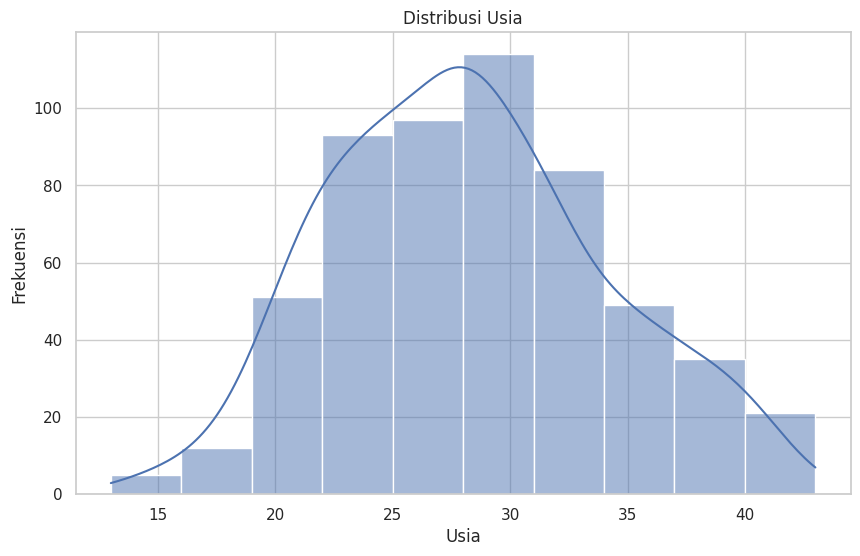

In [78]:


# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['USIA'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


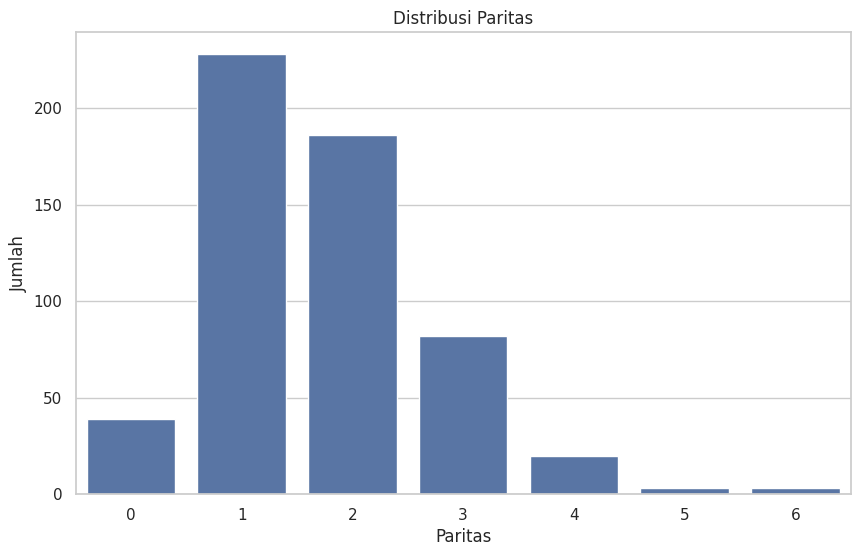

In [79]:
# Visualisasi paritas
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='PARITAS')
plt.title('Distribusi Paritas')
plt.xlabel('Paritas')
plt.ylabel('Jumlah')
plt.show()


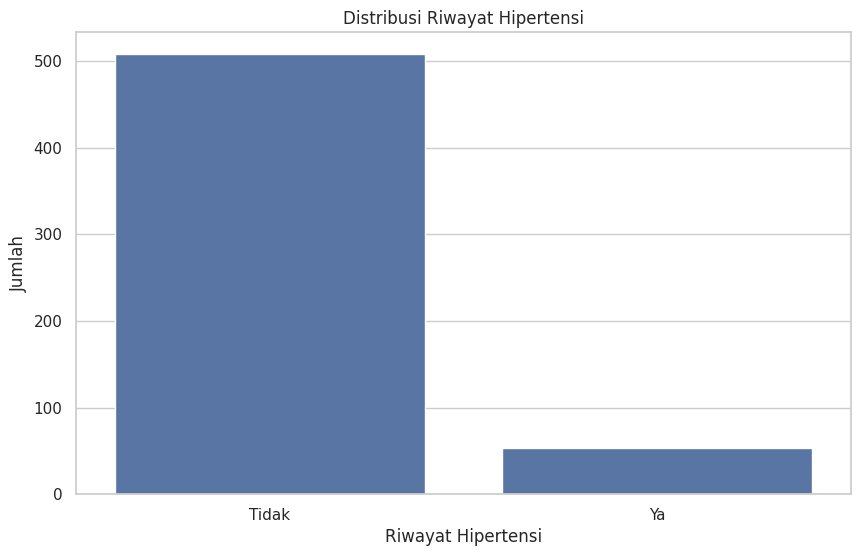

In [80]:
# Visualisasi riwayat hipertensi
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='RIW_HIPERTENSI')
plt.title('Distribusi Riwayat Hipertensi')
plt.xlabel('Riwayat Hipertensi')
plt.ylabel('Jumlah')
plt.show()


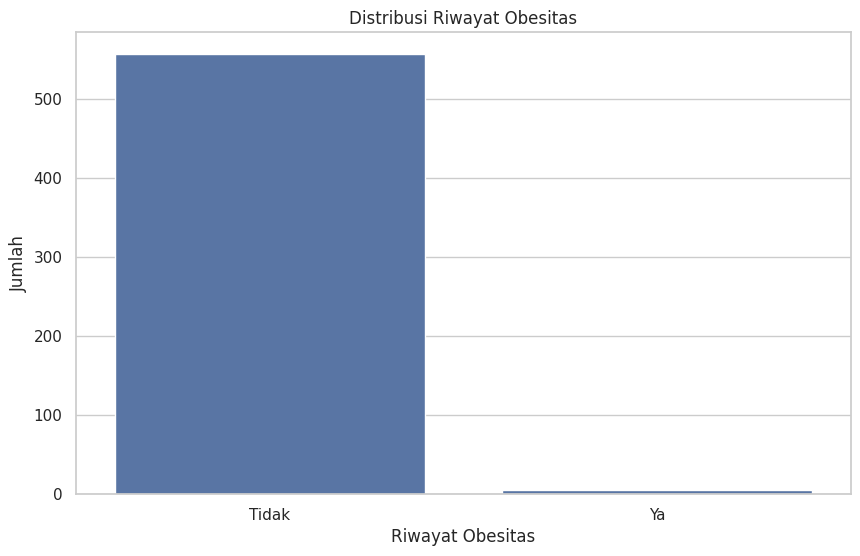

In [81]:
# Visualisasi riwayat obesitas
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='OBESITAS')
plt.title('Distribusi Riwayat Obesitas')
plt.xlabel('Riwayat Obesitas')
plt.ylabel('Jumlah')
plt.show()

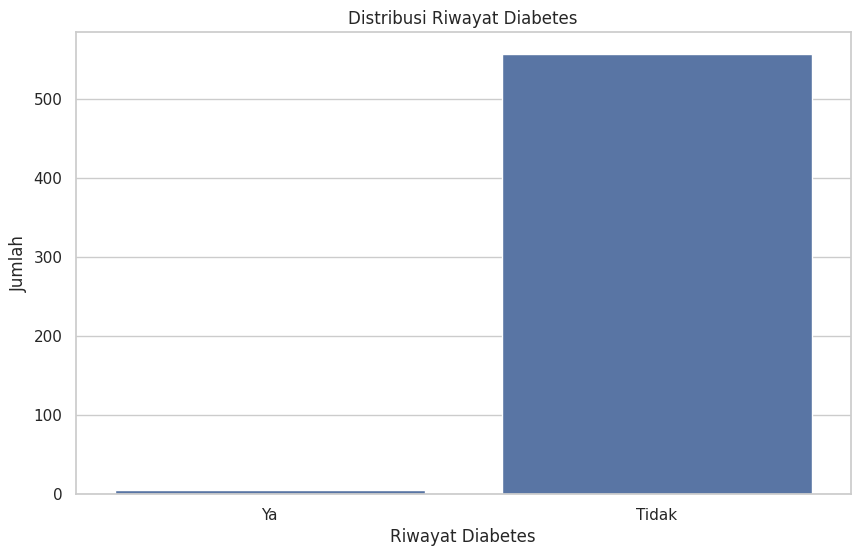

In [82]:
# Visualisasi riwayat diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='RIW_DM')
plt.title('Distribusi Riwayat Diabetes')
plt.xlabel('Riwayat Diabetes')
plt.ylabel('Jumlah')
plt.show()

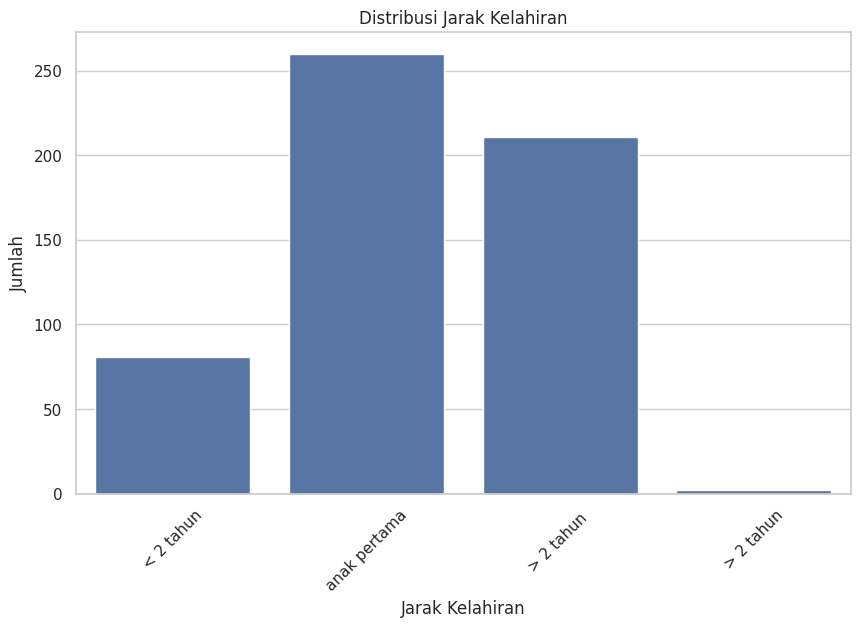

In [83]:


# Visualisasi Jarak Kelahiran dengan bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='JARAK_KELAHIRAN')
plt.title('Distribusi Jarak Kelahiran')
plt.xlabel('Jarak Kelahiran')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


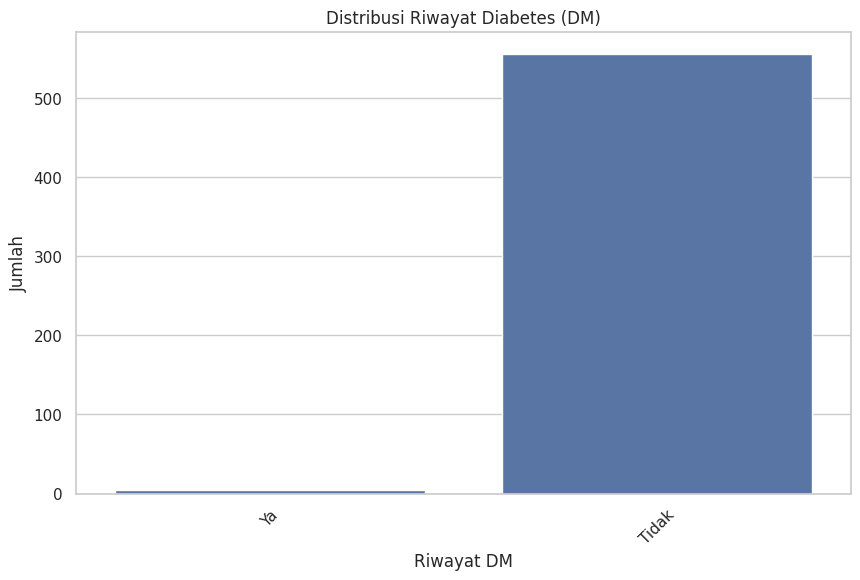

In [84]:


# Visualisasi Riwayat DM dengan bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='RIW_DM')
plt.title('Distribusi Riwayat Diabetes (DM)')
plt.xlabel('Riwayat DM')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


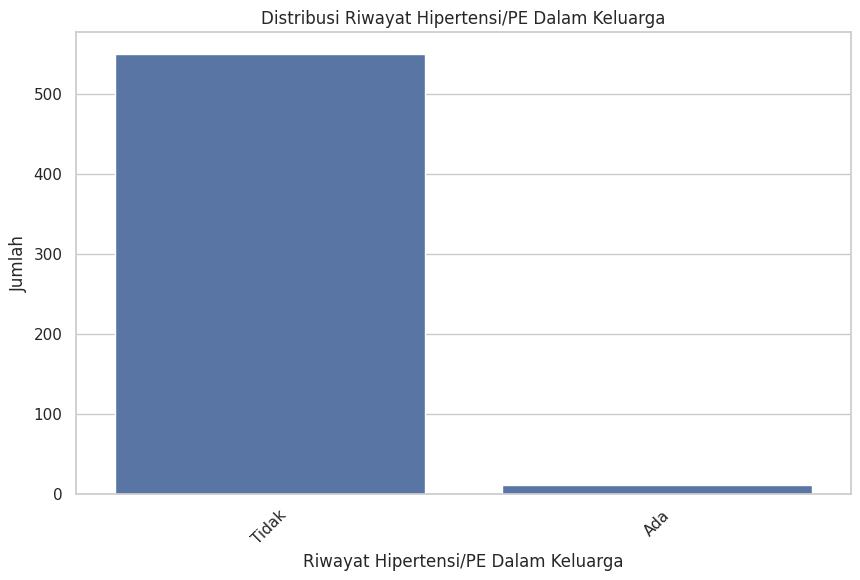

In [85]:


# Visualisasi riwayat hipertensi/PE dalam keluarga dengan bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='RIW_HIPERTENSI_PE_KELUARGA')
plt.title('Distribusi Riwayat Hipertensi/PE Dalam Keluarga')
plt.xlabel('Riwayat Hipertensi/PE Dalam Keluarga')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


#Pra-pemprosesan Data

Dilakukan prapemrosesan data, yaitu:

Menghapus kolom yang tidak diperlukan.
Membersihkan dan mengisi nilai yang hilang dalam kolom USIA.
Memastikan tidak ada nilai kosong di dataset.
Mengisi nilai kosong di kolom lain menggunakan mode.
Melakukan encoding pada kolom-kolom kategorikal sehingga bisa digunakan dalam algoritma pembelajaran mesin.

In [86]:
# Prapemrosesan Data

# Hapus kolom yang tidak relevan atau tidak ada tanpa menyebabkan error
df = df.drop(columns=['Unnamed: 12', 'NO', 'NAMA'], errors='ignore')

# Ubah kolom 'USIA' menjadi numerik
# Isi nilai NaN dengan median sebelum konversi ke integer
# The 'USIA' column is not string type so we must first convert it to string
df['USIA'] = df['USIA'].astype(str)
df['USIA'] = df['USIA'].str.extract('(\d+)')  # Ekstrak angka dari string
# Convert to numeric before filling NaN to avoid TypeError
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce') #Convert to numeric, invalid parsing will be set as NaN
df['USIA'] = df['USIA'].fillna(df['USIA'].median())  # Isi NaN dengan median
df['USIA'] = df['USIA'].astype(int)  # Konversi ke integer

# Periksa apakah ada nilai kosong di dataset
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

# Isi nilai kosong jika ada dengan metode yang sesuai (misalnya, mode untuk kategori)
df.fillna(df.mode().iloc[0], inplace=True)

Jumlah nilai kosong per kolom:
USIA                                0
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


In [87]:
print(df.head())

   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS RIW DM  \
0    23        3       < 2 tahun          Tidak  Tidak    Tidak     Ya   
1    29        2       < 2 tahun          Tidak    PEB    Tidak  Tidak   
2    20        1    anak pertama          Tidak  Tidak    Tidak  Tidak   
3    18        1    anak pertama          Tidak  Tidak    Tidak  Tidak   
4    34        3      > 2 tahun           Tidak  Tidak    Tidak  Tidak   

  RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE  
0                            Tidak         >UMR    Non PE  
1                              Ada         >UMR        PE  
2                            Tidak         >UMR    Non PE  
3                            Tidak         >UMR    Non PE  
4                            Tidak         >UMR    Non PE  


In [88]:
# Encode categorical variables
le = LabelEncoder()
for column in ['PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH', 'PE/Non PE']:
    df[column] = le.fit_transform(df[column].astype(str))  # Pastikan tipe data string sebelum encoding

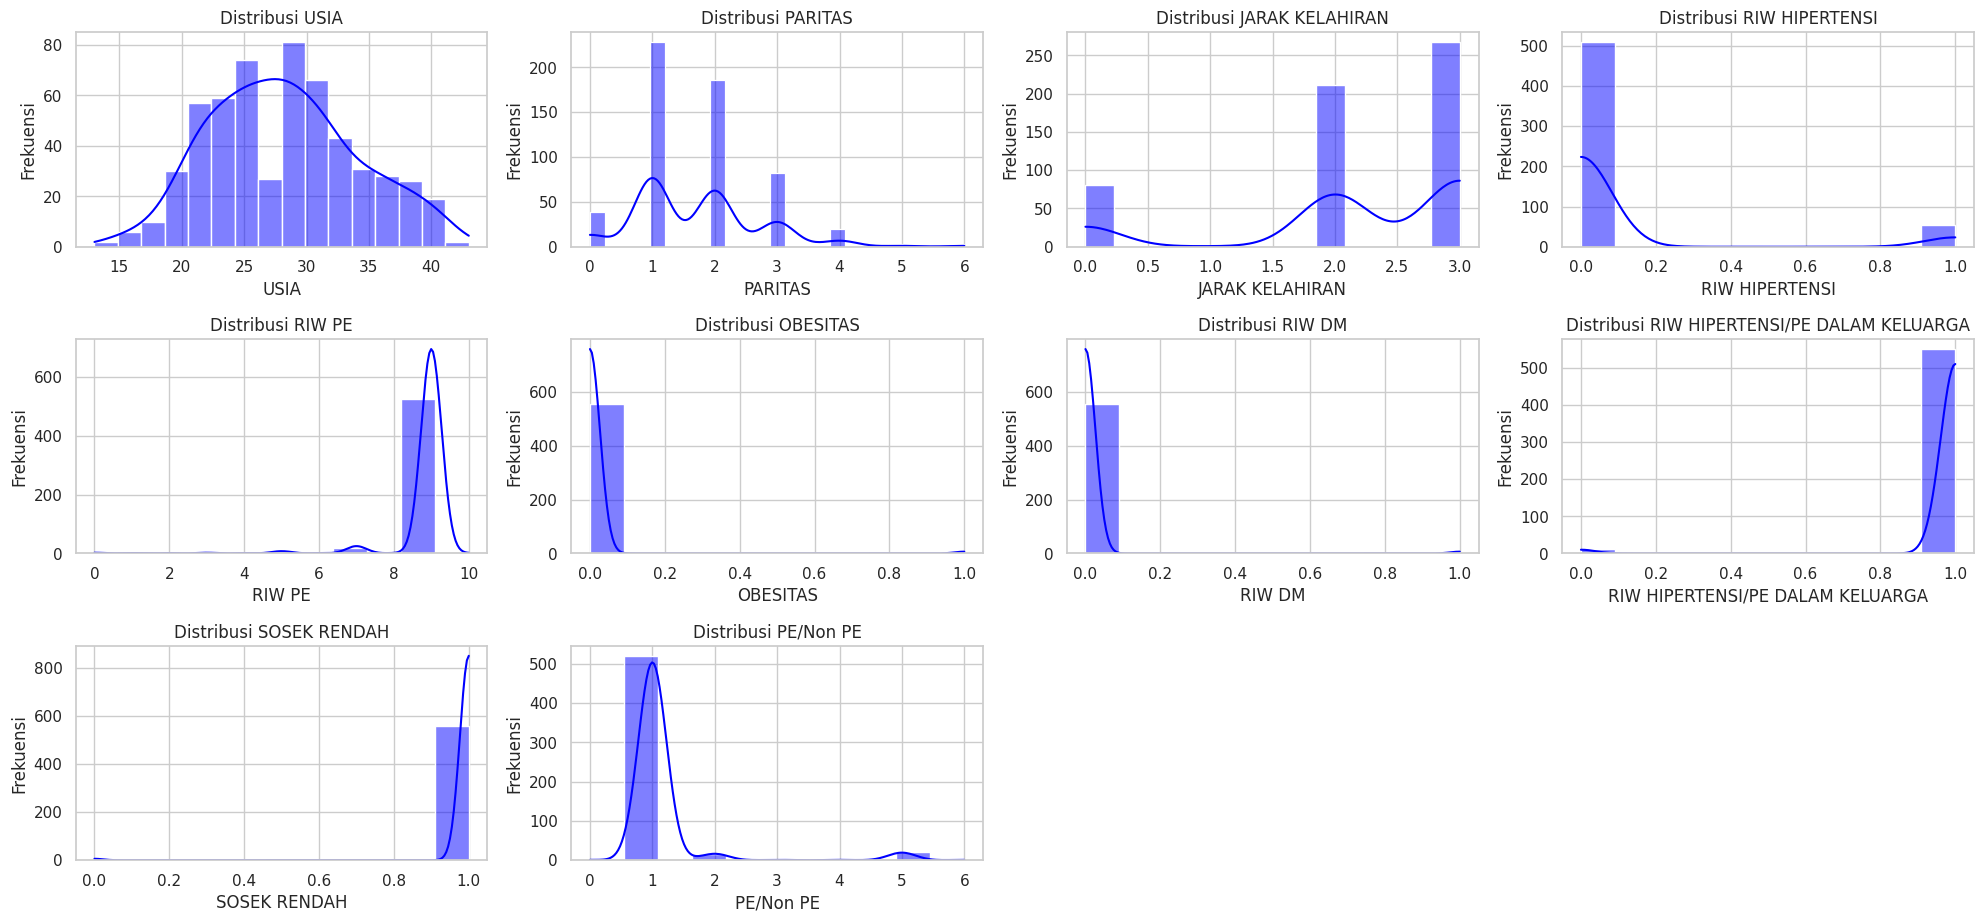

In [89]:


# Mengatur gaya tampilan plot
sns.set(style="whitegrid")

# Visualisasi distribusi data numerik
plt.figure(figsize=(20, 15))  # Mengatur ukuran figure
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Pilih kolom numerik

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)  # Mengatur layout grid untuk subplot (5 baris x 4 kolom)
    sns.histplot(df[col], kde=True, color='blue')  # Visualisasi distribusi dengan KDE
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



<ipython-input-90-97129926aaf2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Visualisasi frekuensi kategori
<ipython-input-90-97129926aaf2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Visualisasi frekuensi kategori
<ipython-input-90-97129926aaf2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Visualisasi frekuensi kategori
<ipython-input-90-97129926aaf2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is dep

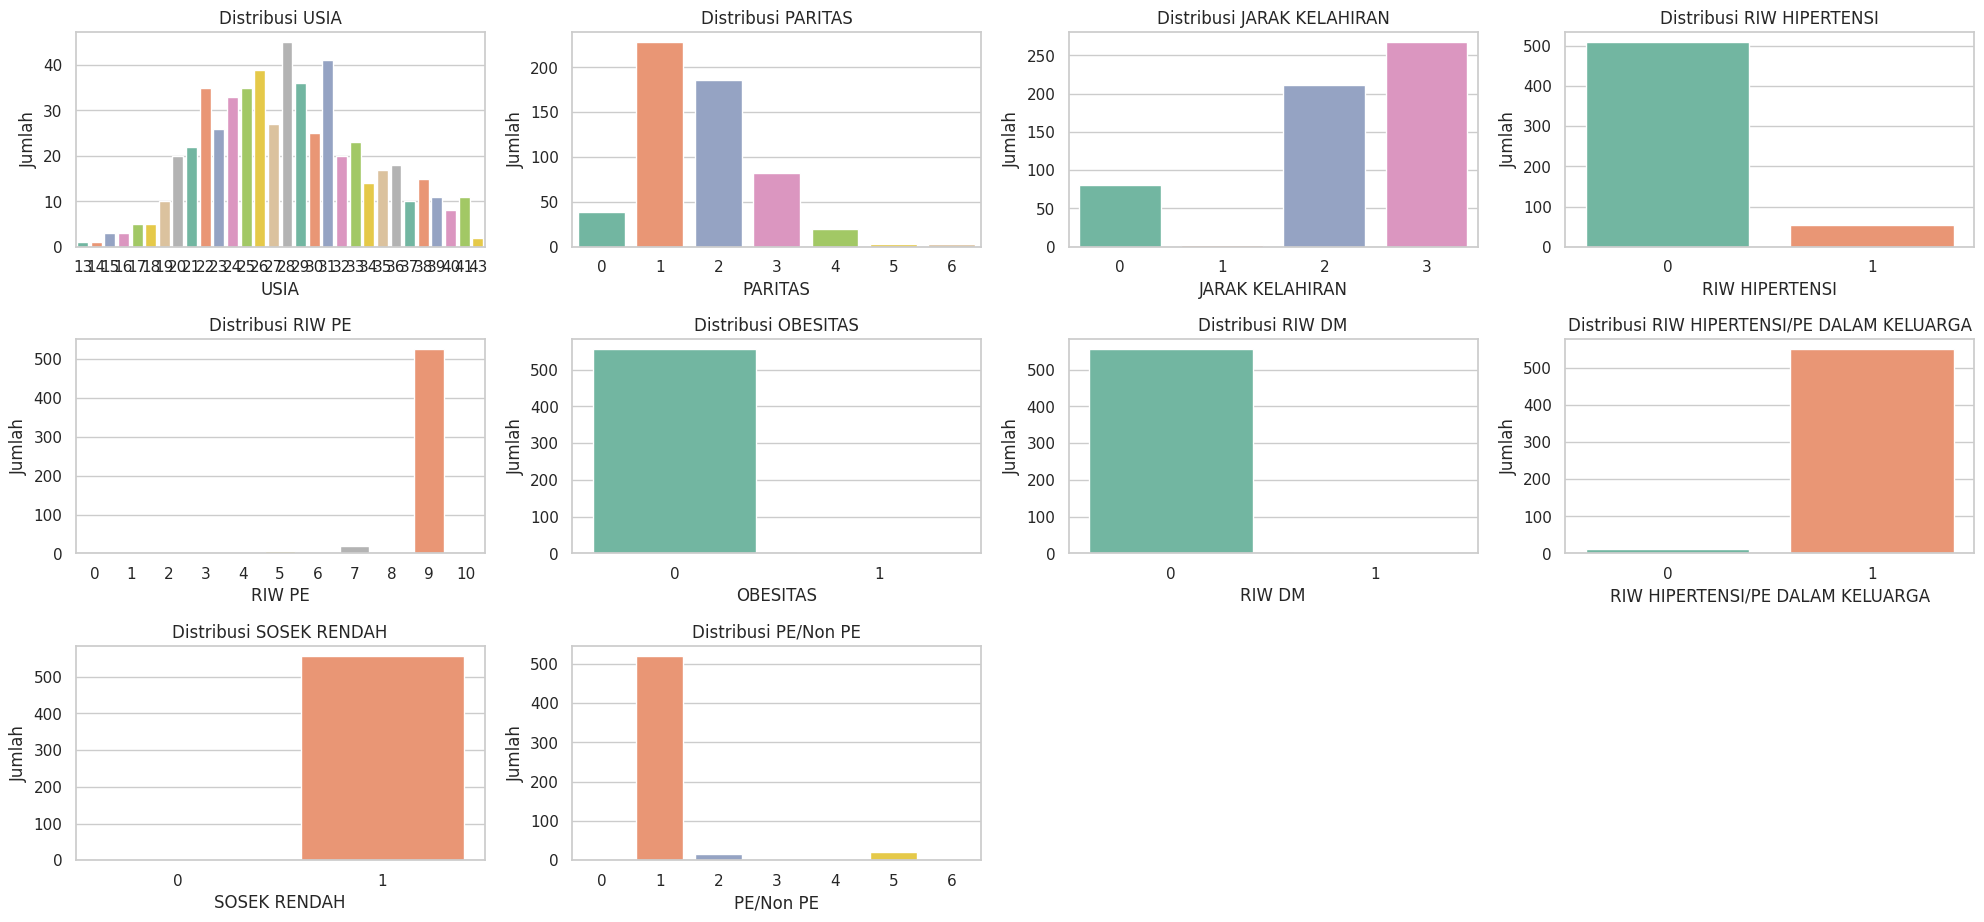

In [90]:
# Visualisasi distribusi data kategorikal
plt.figure(figsize=(20, 15))  # Mengatur ukuran figure
categorical_columns = df.select_dtypes(include=['object', 'category', 'int']).columns  # Pilih kolom kategorikal

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)  # Mengatur layout grid untuk subplot (5 baris x 4 kolom)
    sns.countplot(data=df, x=col, palette='Set2')  # Visualisasi frekuensi kategori
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


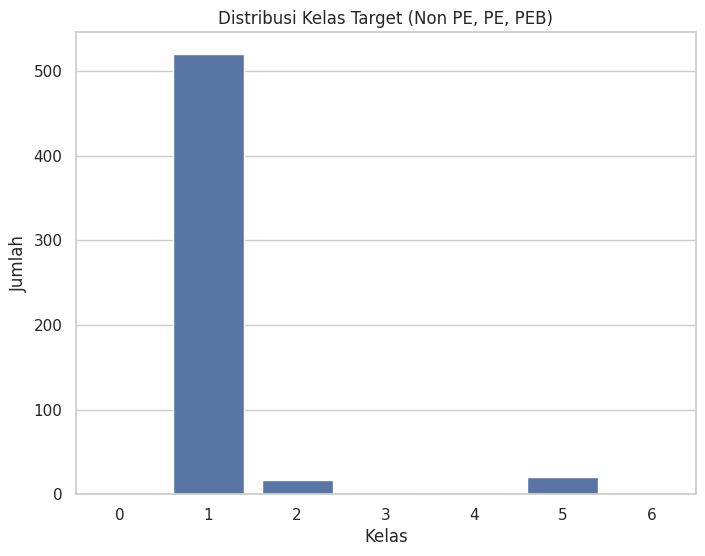

In [91]:

# 1. Plot distribusi kelas target (Non PE, PE, PEB)
plt.figure(figsize=(8,6))
sns.countplot(x='PE/Non PE', data=data_cleaned)
plt.title('Distribusi Kelas Target (Non PE, PE, PEB)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()




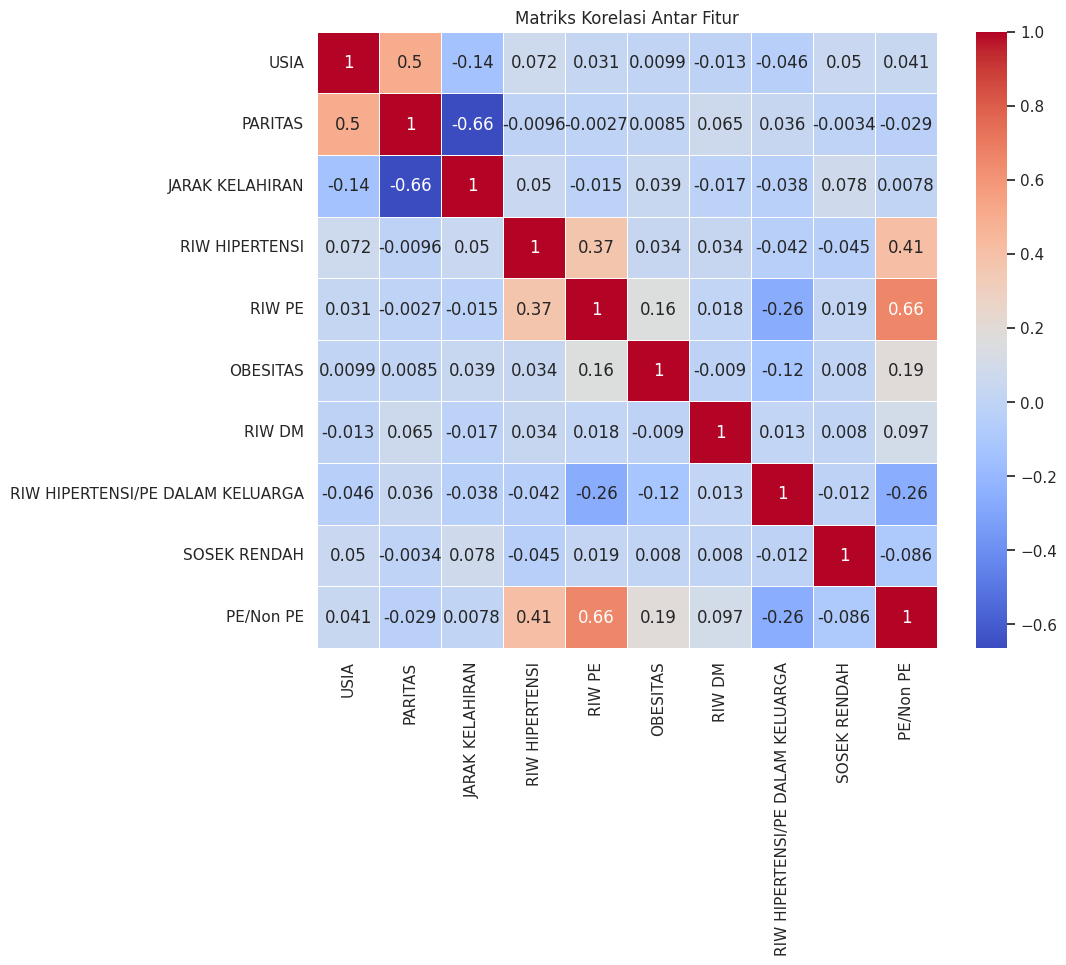

In [92]:
Visualisasi Korelasi antar Fitur
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

